## ADVANCED MACHINE LEARNING - END TERM EXAMINATION

### PROBLEM: Developing an SMS Spam Filter

#### Team Members:
**D22003 - Akansha Raj**    
**D22019 - I Harshitha**      
**D22041 - Rallabandi Sai Sasi Sekhar**      

## Sections:
**1) Reading the Data**     
**2) Text Pre-processing**     
**3) Data Exploration**     
**4) Vectorization**     
**5) Dimension Reduction**      
**6) Spam Filters**     

## 1) Reading the Data 
**Read the data in a Data Frame with two columns named SMS and Labels.**

In [124]:
#Importing libraries
import numpy as np
import pandas as pd

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re, string, unicodedata
from string import punctuation
from termcolor import colored
from collections import Counter

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import keras
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer

import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sekha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sekha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sekha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [403]:
#Reading the data set in a Dataframe 
#Naming the columns as 'SMS' and 'Labels'
sms = pd.read_csv("SMSSpamCollection.txt", sep='\t',names=['Labels','SMS'],header=None)

In [404]:
#Retrieving the first 5 rows
sms.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [405]:
#Checking the shape of the dataset
sms.shape

(5572, 2)

In [406]:
#Checking for Null values
sms.isnull().sum()

Labels    0
SMS       0
dtype: int64

In [407]:
#Checking for duplicate values
sms.duplicated().sum()

403

**There are 403 duplicated values in the dataset**

**Duplication just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. For example, if you're using a web scraper you may happen to scrape the same webpage more than once, or the same information from two different pages. Whatever the reason, deduplication can lead you to make incorrect conclusions by leading you to believe that some observations are more common than they really are.**

**Normally we should probably remove them. Duplicates are an extreme case of nonrandom sampling, and they bias your fitted model. Including them will essentially lead to the model overfitting this subset of points**

In [408]:
#Dropping the duplicates
sms.drop_duplicates(inplace = True)

In [409]:
#Checking the shape of the dataset after removing the duplicates
sms.shape

(5169, 2)

In [410]:
sms1 = sms.copy()

## 2) Text Pre-processing
**Use appropriate text pre-processing techniques to clean the texts.**       
**Be creative with your approaches here; each step needs to be justified.**       

#### 1. Converting the text into lower cases

In [411]:
sms1.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [412]:
sms1["SMS"] = sms1["SMS"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [413]:
sms1.head()

,Labels,SMS
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


#### 2. Remove Punctuations/special symbols

In [414]:
#Removing punctuation from all the SMS
sms1["SMS"] = sms1["SMS"].str.replace('[^\w\s]','')

In [415]:
sms1.head()

,Labels,SMS
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


#### 3. Remove stopwords 

**Stopwords:     
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some examples removing stopwords are:**

In [416]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sekha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [417]:
#NLTK stopword list
stop_words = stopwords.words("english")

In [418]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [419]:
#Remove stop words from a single SMS
" ".join([w for w in sms1.SMS[0].split() if w not in stop_words])

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [420]:
#Removing stopwords and punctuation from all the SMS
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

sms1["SMS"] = sms1["SMS"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [421]:
sms1.head()

,Labels,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


#### 4. Lemmatization. That is, we get the roots of the words

In [422]:
sms1["SMS"] = sms1["SMS"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [423]:
sms1.head()

,Labels,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though


#### 5. Remove URLs from texts if there is any

In [424]:
sms1["SMS"] = sms1["SMS"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))

In [425]:
sms1.head()

,Labels,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though


#### 6. Remove white spaces

In [426]:
sms1["SMS"] = sms1["SMS"].apply(lambda x: " ".join(re.sub("  ", " ", x) for x in x.split()))

In [427]:
sms1.head()

,Labels,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though


#### 7. Stemming

In [428]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps

<PorterStemmer>

In [429]:
#Remove stopwords from all the tweets
sms1["SMS"] = sms1["SMS"].apply(lambda x:" ".join([ps.stem(x) for x in x.split()]))

In [430]:
sms1.head()

,Labels,SMS
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think go usf life around though


In [431]:
# replace the labels 'ham' with 0 and 'spam' with 1
sms1['Labels'] = sms1['Labels'].map({'ham': 0, 'spam': 1})

# check if the encoding is correct
print(sms1['Labels'].value_counts())

0    4516
1     653
Name: Labels, dtype: int64


In [432]:
sms1.head()

,Labels,SMS
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think go usf life around though


## 3) Data Exploration
**Explore the word frequencies of the SMS in each category. Use word clouds for this. Explain your
observations.**       

In [433]:
sms1.describe()

,Labels
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [434]:
sms.groupby('Labels').describe()

SMS                                                               
       count unique                                                top freq
Labels                                                                     
ham     4516   4516  Go until jurong point, crazy.. Available only ...    1
spam     653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

**We have 4516 ham message and 653 spam message**

In [435]:
# examine the class distribution
sms1.Labels.value_counts()

0    4516
1     653
Name: Labels, dtype: int64

<AxesSubplot:xlabel='Labels', ylabel='count'>

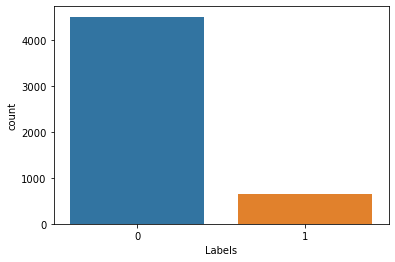

In [436]:
sns.countplot(sms1["Labels"])

Text(0, 0.5, 'Number of Data points')

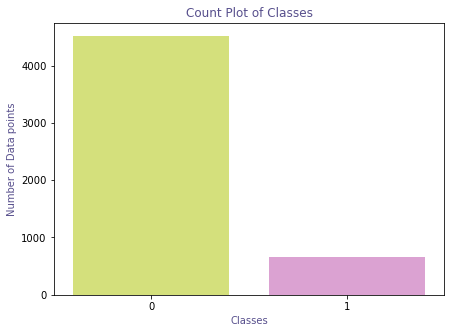

In [437]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
#Palette
cols= ["#E1F16B", "#E598D8"]
plt.figure(figsize=(7,5))
fg = sns.countplot(x= sms1["Labels"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

**Note: From the above countplot the data imbalance is quite evident.**

In [438]:
sms1.head()

,Labels,SMS
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think go usf life around though


In [439]:
sms2 = sms1.copy()

In [440]:
sms2['message_len'] = sms2.SMS.apply(len)
sms2.head()

,Labels,SMS,message_len
0,0,go jurong point crazi avail bugi n great world...,76
1,0,ok lar joke wif u oni,21
2,1,free entri 2 wkli comp win fa cup final tkt 21...,131
3,0,u dun say earli hor u c alreadi say,35
4,0,nah dont think go usf life around though,40


Text(0.5, 0, 'Message Length')

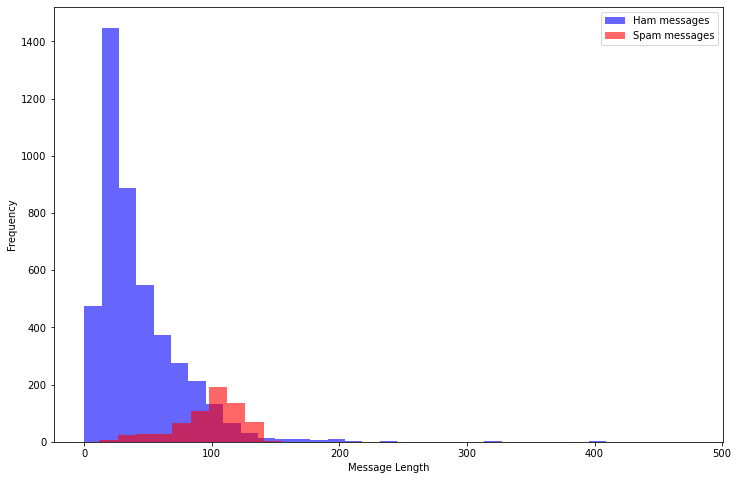

In [441]:
plt.figure(figsize=(12, 8))

sms2[sms2.Labels==0].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms2[sms2.Labels==1].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters.

In [442]:
sms2[sms2.Labels==0].describe()

,Labels,message_len
count,4516.0,4516.000000
mean,0.0,42.017715
std,0.0,34.138376
min,0.0,0.000000
25%,0.0,20.000000
50%,0.0,32.000000
75%,0.0,55.000000
max,0.0,477.000000


In [443]:
sms2[sms2.Labels==1].describe()

,Labels,message_len
count,653.0,653.000000
mean,1.0,98.800919
std,0.0,25.753674
min,1.0,12.000000
25%,1.0,87.000000
50%,1.0,103.000000
75%,1.0,117.000000
max,1.0,155.000000


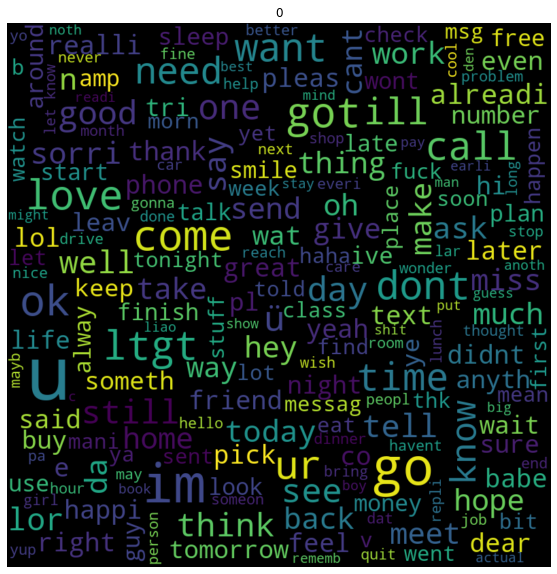

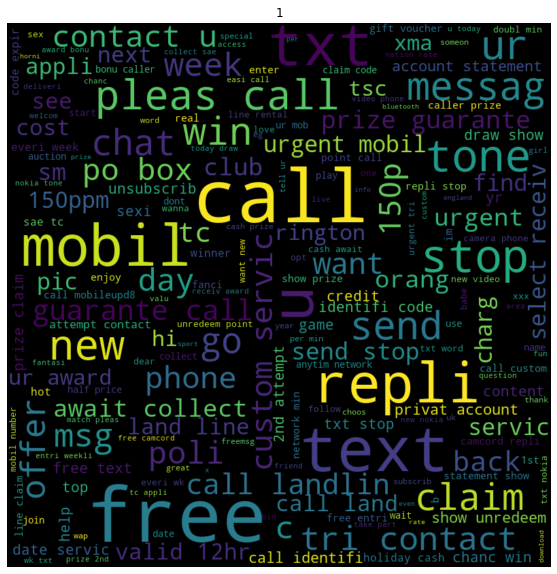

In [444]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group the data by the target variable (spam/ham)
grouped = sms1.groupby("Labels")

# Iterate through each group and create a wordcloud for each group
for name, group in grouped:
    text = " ".join(group["SMS"])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(name)
    plt.show()

In [445]:
sms2.head()

,Labels,SMS,message_len
0,0,go jurong point crazi avail bugi n great world...,76
1,0,ok lar joke wif u oni,21
2,1,free entri 2 wkli comp win fa cup final tkt 21...,131
3,0,u dun say earli hor u c alreadi say,35
4,0,nah dont think go usf life around though,40


**FEATURE ENGINEERING**

For the purpose of data exploration, I am creating new features    

No_of_Characters: Number of characters in the text message     
No_of_Words: Number of words in the text message    
No_of_sentence: Number of sentences in the text message      

In [446]:
#Adding a column of numbers of charachters,words and sentences in each msg
sms2["No_of_Characters"] = sms2["SMS"].apply(len)
sms2["No_of_Words"]= sms2.apply(lambda row: nltk.word_tokenize(row["SMS"]), axis=1).apply(len)
sms2["No_of_sentence"]= sms2.apply(lambda row: nltk.sent_tokenize(row["SMS"]), axis=1).apply(len)

sms2.describe().T

#PS. At this step, I tokenised the words and sentences and used the length of the same. 
#More on Tokenizing later in the notebook.

,count,mean,std,min,25%,50%,75%,max
Labels,5169.0,0.126330,0.332253,0.0,0.0,0.0,0.0,1.0
message_len,5169.0,49.191139,38.181002,0.0,21.0,36.0,71.0,477.0
No_of_Characters,5169.0,49.191139,38.181002,0.0,21.0,36.0,71.0,477.0
No_of_Words,5169.0,9.313987,6.779668,0.0,4.0,7.0,13.0,80.0
No_of_sentence,5169.0,0.999033,0.031089,0.0,1.0,1.0,1.0,1.0


<Figure size 864x576 with 0 Axes>

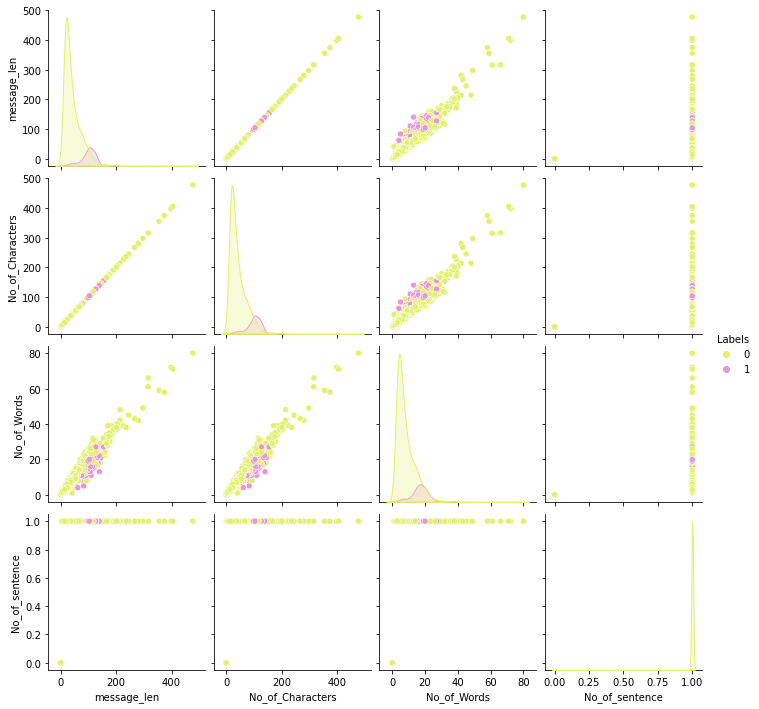

In [447]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=sms2, hue="Labels",palette=cols)
plt.show(fg)

Note: From the pair plot, we can see a few outliers all in the class ham. This is interesting as we could put a cap over one of these. As they essentially indicate the same thing ie the length of SMS.      

Next, I shall be dropping the outliers      

**Top 30 words in ham and spam messages**

**Collections: Counter**

In [448]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

In [449]:
from collections import Counter

In [450]:
sms_ham  = sms2[sms2['Labels'] == 0].copy()
sms_spam = sms2[sms2['Labels'] == 1].copy()

In [451]:
sms_ham.loc[:, 'SMS'] = sms_ham['SMS'].apply(remove_punctuation_and_stopwords)
words_data_ham = sms_ham['SMS'].tolist()
sms_spam.loc[:, 'SMS'] = sms_spam['SMS'].apply(remove_punctuation_and_stopwords)
words_data_spam = sms_spam['SMS'].tolist()

In [452]:
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [453]:
list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [454]:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

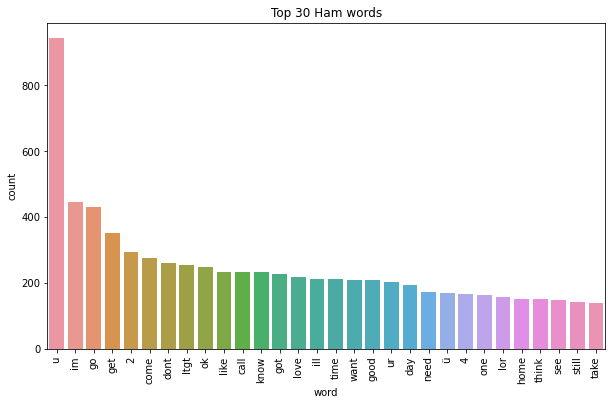

In [455]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

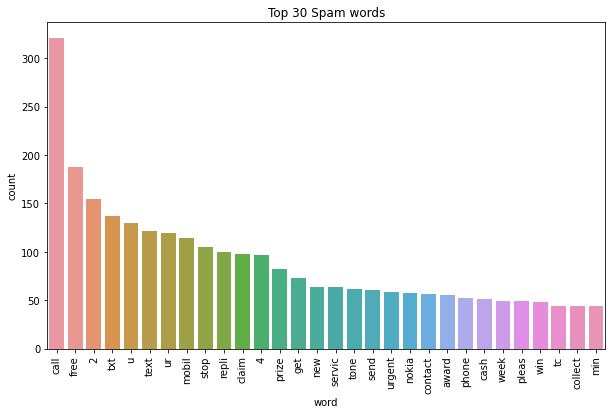

In [456]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

**NLTK: FreqDist**

In [457]:
fdist_ham  = nltk.FreqDist(list_ham_words)
fdist_spam = nltk.FreqDist(list_spam_words)

In [458]:
df_hamwords_top30_nltk  = pd.DataFrame(fdist_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30_nltk = pd.DataFrame(fdist_spam.most_common(30), columns=['word', 'count'])

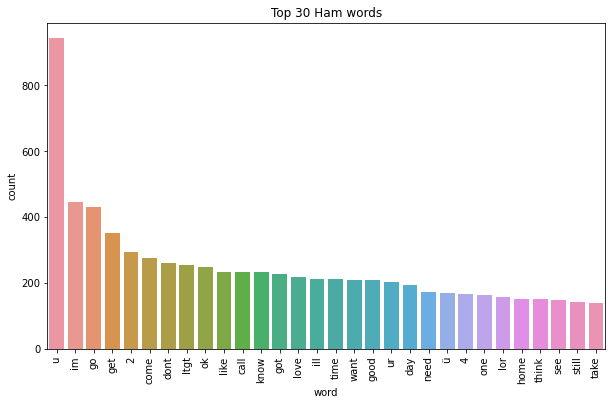

In [459]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_hamwords_top30_nltk, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

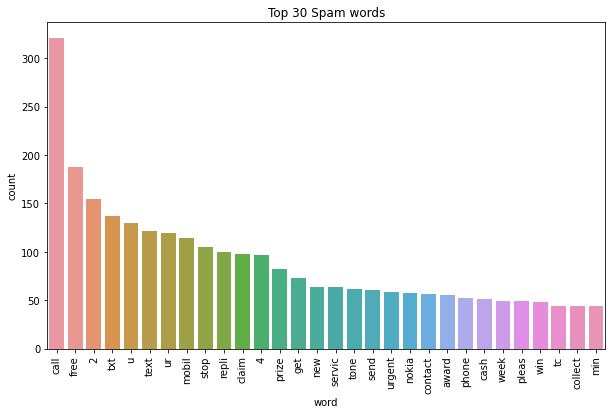

In [460]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_spamwords_top30_nltk, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

## 4) Vectorization
**Each SMS given in the corpus must be expressed in a vectorized form. Here are the four ways of doing
so.**         
**a) Vectorization using TF.**     
**b) Vectorization using TF-IDF.**       
**c) Use doc-to-vec model using Google’s word-to-vec model. (you may use any other embeddings as
well like ELMO, etc.)**       
**d) Generate some heuristic features like “presence of phone number’, etc.**           

In [461]:
# Sample explanation

Representing text as numerical data

In [462]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

Text Analysis is a major application field for ML algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.        
 
We will use CountVectorizer to **"convert text into a matrix of token counts":**    

In [463]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)

# examine the fitted vocabulary
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [464]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [465]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [466]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In this scheme, features and samples are defined as follows:        

Each individual token occurrence frequency (normalized or not) is treated as a feature.      
The vector of all the token frequencies for a given document is considered a multivariate sample.        
A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.       

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.        

In [467]:
# check the type of the document-term matrix
print(type(simple_train_dtm))

# examine the sparse matrix contents
print(simple_train_dtm)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In order to be able to store such a matrix in memory but also to speed up operations, implementations will typically use a sparse representation such as the implementations available in the scipy.sparse package.

In [468]:
# example text for model testing
simple_test = ["please don't call me"]

In order to make a prediction, the new observation must have the same features as the training observations, both in number and meaning.

In [469]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [470]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


 Summary:   
vect.fit(train) learns the vocabulary of the training data    
vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data     
vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)     

#### a) TF - Document-Term Matrix

#### 1. Get the Bag-Of-Words (BOW) Dataframe

In [471]:
from sklearn.feature_extraction.text import CountVectorizer

In [472]:
#using count vectoroizer to create a document-term matrix
cv = CountVectorizer()
X = np.array(cv.fit_transform(sms1.SMS).toarray())

In [473]:
# In the previous cell, the np.array(X.toarray()) is not required, Directly X.toarray() also will be ok

In [474]:
#The word list
names = cv.get_feature_names()

In [475]:
len(names)

8050

In [476]:
names

['008704050406',
 '0089mi',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073'

In [477]:
#Converting the document-term matrix to a dataframe
DTM = pd.DataFrame(X, columns=names)

In [478]:
DTM.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [479]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer
 
# Ticket Data
corpus = sms1['SMS'].values
 
# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
#CountVectorizedData['Labels']=sms1['Labels']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(5169, 7919)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [480]:
CountVectorizedData.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### b) Vectorization using TF-IDF

#### Get the Bag-Of-Words (BOW) Dataframe with TF-IDF vectorizor

In [481]:
# TF-IDF vectorization of text
#!pip install sklearn.feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction import _stop_words
 
corpus = sms1['SMS'].values
 
# Creating the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
DataForML_tfidf=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
#DataForML_tfidf['Labels']=sms1['Labels']
print(DataForML_tfidf.shape)
DataForML_tfidf.head()

(5169, 7919)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [482]:
DataForML_tfidf.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### c) Use doc-to-vec model using Google’s word-to-vec model. (you may use any other embeddings as well like ELMO, etc.)

In [497]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer
 
# Ticket Data
corpus = sms1['SMS'].values
 
# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['Labels']=sms1['Labels']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(5169, 7920)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [291]:
#Installing the gensim library required for word2Vec and Doc2Vec
#!pip install gensim

In [292]:
import os
import gensim
#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [498]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]
 
# Printing sample words
WordsVocab[0:10]

Index(['008704050406', '0089mi', '0121', '01223585236', '01223585334',
       '0125698789', '02', '020603', '0207', '02070836089'],
      dtype='object')

In [499]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):
 
        # initiating a sentence with all zeros
        Sentence = np.zeros(300)
 
        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

In [500]:
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(sms1['SMS'])
 
# Checking the new representation for sentences
W2Vec_Data.shape

amor
avail
buffet
bugi
cine
crazi
got
great
jurong
la
point
wat
world
joke
lar
ok
oni
wif
08452810075over18
2005
21st
87121
appli
comp
cup
entri
fa
final
free
questionstd
ratetc
receiv
text
tkt
txt
win
wkli
alreadi
dun
earli
hor
say
dont
life
nah
think
usf
150
chg
darl
freemsg
fun
hey
id
like
ok
rcv
send
std
tb
week
word
xxx
aid
brother
like
patent
speak
treat
caller
callertun
copi
friend
mell
minnaminungint
nurungu
oru
press
request
set
vettam
09061701461
12
900
claim
code
custom
hour
kl341
network
prize
receivea
reward
select
valid
valu
winner
08002986030
11
camera
colour
entitl
free
latest
mobil
month
updat
anymor
cri
dont
gonna
home
im
ive
soon
stuff
talk
today
tonight
want
100
150pday
16
20000
6day
87575
appli
cash
chanc
cost
csh11
hl
info
pound
repli
send
tsandc
txt
win
100000
4403ldnw1a7rw18
81010
claim
free
jackpot
lccltd
membership
pobox
prize
tc
txt
urgent
week
word
wwwdbuknet
bless
breather
fulfil
grant
help
ive
promis
right
search
thank
time
wonder
wont
word
date
sunday
cli

(5169, 300)

In [501]:
# Comparing the above with the document term matrix
CountVectorizedData.shape

(5169, 7920)

In [502]:
CountVectorizedData.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [488]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
#W2Vec_Data['Labels']=CountVectorizedData['Labels']
 
# Assigning to DataForML variable
DataForML_w2v=W2Vec_Data
DataForML_w2v.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Labels
0,-0.267883,0.761475,0.576538,2.297852,0.047028,0.343628,0.933655,-0.978302,-0.044128,0.892578,...,0.603821,-1.525879,0.846588,-0.092361,-0.592651,-0.530762,-0.948242,-0.427490,0.372101,0.0
1,-0.260757,0.299438,0.103943,0.685059,-0.372070,0.508789,-0.010742,-0.102234,0.265869,0.547363,...,0.501221,-0.682556,0.096069,-0.933594,-0.669067,-0.769531,-0.490814,-0.537598,0.562988,0.0
2,-0.268555,0.125000,-0.585083,0.800537,0.284790,0.121674,-0.342163,-1.007172,0.780762,1.662231,...,0.350830,-0.495300,-0.639526,-0.289978,-0.859619,-0.236603,-1.437988,-1.117363,0.381886,1.0
3,-0.021484,0.142090,0.479492,0.430664,-0.154297,0.204826,0.240601,0.078369,-0.057617,0.705078,...,0.458252,0.031738,0.168457,-0.274170,-0.448730,-0.166267,-0.275879,-0.116211,0.491211,0.0
4,-0.175049,0.204865,0.431030,1.067383,0.147339,0.149414,0.373901,-0.354286,0.357178,0.268799,...,0.792114,-0.755615,0.191040,-0.988739,-0.184326,-0.165039,-0.400024,-0.096867,0.263184,0.0


In [503]:
DataForML_w2v.shape

(5169, 301)

#### d) Generate some heuristic features like “presence of phone number’, etc.

In [504]:
import re
import pandas as pd

# Define a function to check if a string contains a phone number
def contains_phone_number(text):
    pattern = r'\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}'
    return 1 if re.search(pattern, text) else 0

# Apply the function to the messages column to create a new column for phone number presence
sms1['phone_number_presence'] = sms1['SMS'].apply(contains_phone_number)

In [505]:
sms1.head()

,Labels,SMS,phone_number_presence
0,0,go jurong point crazi avail bugi n great world...,0
1,0,ok lar joke wif u oni,0
2,1,free entri 2 wkli comp win fa cup final tkt 21...,1
3,0,u dun say earli hor u c alreadi say,0
4,0,nah dont think go usf life around though,0


In [506]:
sms1.Labels.value_counts()

0    4516
1     653
Name: Labels, dtype: int64

In [507]:
sms1.phone_number_presence.value_counts()

0    4783
1     386
Name: phone_number_presence, dtype: int64

## 5) Dimension Reduction        
**a) Use PCA for dimension reduction. Keep the number of components that explains at least 95% of
the overall variance.**              
**b) Visualize the data across the first two PCs. Use colour encodings for the labels for better
visualization. (You may play across other PCs as well)**               
**c) You may try other heuristic approaches for dimension reduction as well like dropping texts that
appear in less than p% of the documents. (This would bring you some brownie points)**                

**5a.1) PCA - Dimension Reduction for TF Vectorization**

In [508]:
### Dimension Reduction ###
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

auto selected components count:  1987
[  1.64351829   3.02451606   4.21920653 ... 100.         100.
 100.        ]


Text(0, 0.5, '% Variance explained')

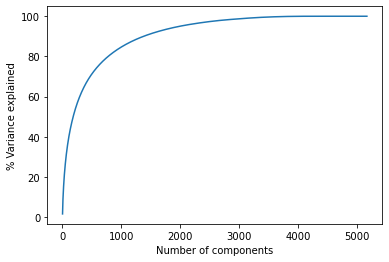

In [509]:
# PCA transform
# Subsetting data for X and y
TargetVariable=CountVectorizedData.columns[-1]
Predictors=CountVectorizedData.columns[:-1]
 
X=CountVectorizedData[Predictors].values
y=CountVectorizedData[TargetVariable].values
 
# fitting the data
pca_fit=pca.fit(X)

pca_df_tf = pd.DataFrame(pca_fit.transform(X))
pca_df_tf.columns = ['PC'+str(i) for i in range(len(pca_df_tf.columns))]

# Selecting > 95% explained varaince
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
n_comp = np.argmax(var_cumu>95)
print('auto selected components count: ',n_comp)

pca_df_tf = pca_df_tf.iloc[:,:n_comp]
pca_df_tf.head()

#Cumulative Variance explained by each component
#var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_cumu)
 
# Look for the elbow in the plot
plt.plot( range(1,len(var_cumu)+1), var_cumu )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [510]:
pca_df_tf.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC1977,PC1978,PC1979,PC1980,PC1981,PC1982,PC1983,PC1984,PC1985,PC1986
0,-0.052602,-0.089654,-0.161277,0.021205,-0.077408,0.136661,0.157514,-0.047851,-0.191446,-0.019775,...,-0.017058,-0.004855,-0.011454,0.073653,0.033249,-0.030622,0.017500,-0.068379,0.011838,-0.031091
1,-0.101115,-0.098873,-0.200788,-0.021444,-0.137443,0.137500,0.183857,0.041705,-0.216659,0.008969,...,0.020980,0.013309,-0.033711,0.002169,-0.026474,0.006391,0.001999,-0.000918,0.007891,0.044213
2,-0.212642,1.020744,0.192184,-0.654225,0.520981,-0.082427,0.048459,-0.081990,-0.144754,0.029797,...,0.000383,0.002208,-0.013819,-0.008828,-0.002743,-0.010757,-0.005261,0.000712,0.004496,0.007913
3,0.001007,-0.119114,-0.142539,0.002013,-0.113095,-0.003039,0.079879,0.053956,-0.177059,-0.002986,...,-0.041068,0.002312,-0.013724,0.012041,0.000914,-0.004116,-0.013989,0.010194,0.011139,-0.006768
4,0.006634,-0.122487,-0.004969,0.248689,0.036855,-0.644573,-0.227201,0.247256,0.014890,-0.136341,...,0.002201,0.004578,0.000822,-0.022478,-0.004963,-0.005248,0.000438,0.013457,-0.020160,-0.008022


**5a.2) PCA - Dimension Reduction for TF-IDF Vectorization**

auto selected components count:  2665
[  0.72785829   1.3372735    1.89525047 ... 100.         100.
 100.        ]


Text(0, 0.5, '% Variance explained')

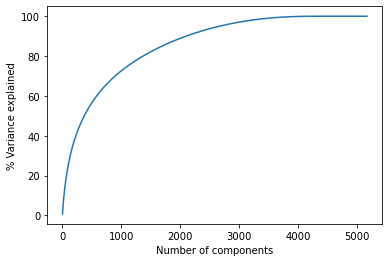

In [511]:
# PCA transform
# Subsetting data for X and y
TargetVariable=DataForML_tfidf.columns[-1]
Predictors=DataForML_tfidf.columns[:-1]
 
X=DataForML_tfidf[Predictors].values
y=DataForML_tfidf[TargetVariable].values
 
# fitting the data
pca_fit=pca.fit(X)

pca_df_tf_idf = pd.DataFrame(pca_fit.transform(X))
pca_df_tf_idf.columns = ['PC'+str(i) for i in range(len(pca_df_tf_idf.columns))]

# Selecting > 95% explained varaince
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
n_comp = np.argmax(var_cumu>95)
print('auto selected components count: ',n_comp)

pca_df_tf_idf = pca_df_tf_idf.iloc[:,:n_comp]
pca_df_tf_idf.head()

#Cumulative Variance explained by each component
#var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_cumu)
 
# Look for the elbow in the plot
plt.plot( range(1,len(var_cumu)+1), var_cumu )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [512]:
pca_df_tf_idf.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC2655,PC2656,PC2657,PC2658,PC2659,PC2660,PC2661,PC2662,PC2663,PC2664
0,-0.013297,-0.015851,0.015378,-0.029680,-0.044981,0.060774,0.026428,-0.052291,0.027046,-0.035838,...,0.008746,-0.007175,-0.009570,-0.003463,-0.000742,-0.009012,0.007516,-0.001211,-0.004534,-0.001788
1,0.261151,-0.074462,-0.022866,-0.024676,-0.002088,-0.032264,-0.001111,0.011728,-0.014064,-0.040703,...,-0.002499,0.000996,0.010110,-0.011765,-0.001353,0.007432,-0.000104,0.001775,-0.004464,-0.006430
2,-0.034760,-0.046021,-0.009480,0.000213,-0.075021,-0.079851,-0.060467,0.022165,0.034634,0.042969,...,0.002547,-0.000520,-0.002891,0.003297,-0.000519,-0.005961,0.004390,0.003045,0.002088,0.003496
3,0.005760,-0.021255,0.005751,-0.006732,-0.038283,0.055973,0.072040,-0.004632,-0.039830,-0.048227,...,-0.008458,0.028900,0.011078,0.003506,-0.021577,-0.007501,0.014549,0.033649,-0.003305,0.012980
4,-0.041329,-0.029994,-0.002611,-0.003890,0.110698,0.049838,0.053672,0.147876,-0.001612,0.015183,...,-0.003205,-0.004579,0.000745,-0.001203,-0.002048,-0.003585,-0.002599,0.004795,0.001996,-0.003362


**5a.3) PCA - Dimension Reduction for word2vec Vectorization**

auto selected components count:  196
[ 26.75605411  33.81834901  38.61150297  40.76097464  42.83499215
  44.59279619  46.06937026  47.37716259  48.53612685  49.62199771
  50.66865587  51.57857727  52.46893145  53.33206158  54.15667307
  54.92452509  55.67474481  56.41531127  57.13283861  57.78664834
  58.42732345  59.04488072  59.64016751  60.21646468  60.78534719
  61.3424506   61.89328266  62.4184208   62.92492404  63.40529412
  63.87621711  64.33895959  64.79519556  65.24866792  65.69442345
  66.12900434  66.54476633  66.95689202  67.36106308  67.76215228
  68.15374483  68.53904475  68.92089759  69.297282    69.66799658
  70.03465362  70.39799823  70.75430409  71.10079138  71.44318473
  71.7744928   72.1039995   72.42336276  72.74158389  73.05288201
  73.36092309  73.65924376  73.95492158  74.24264577  74.52960781
  74.8154208   75.09845394  75.37411675  75.64480089  75.91152106
  76.17548268  76.43664936  76.69617216  76.95230397  77.2060255
  77.45733663  77.70427579  77.95100769 

Text(0, 0.5, '% Variance explained')

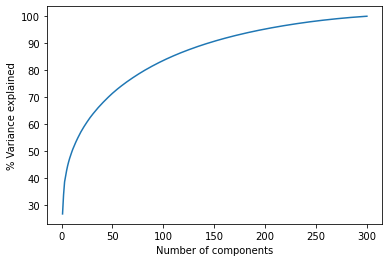

In [513]:
# PCA transform
# Subsetting data for X and y
TargetVariable=DataForML_w2v.columns[-1]
Predictors=DataForML_w2v.columns[:-1]
 
X=DataForML_w2v[Predictors].values
y=DataForML_w2v[TargetVariable].values
 
# fitting the data
pca_fit=pca.fit(X)

pca_df_w2v = pd.DataFrame(pca_fit.transform(X))
pca_df_w2v.columns = ['PC'+str(i) for i in range(len(pca_df_w2v.columns))]

# Selecting > 95% explained varaince
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
n_comp = np.argmax(var_cumu>95)
print('auto selected components count: ',n_comp)

pca_df_w2v = pca_df_w2v.iloc[:,:n_comp]
pca_df_w2v.head()

#Cumulative Variance explained by each component
#var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_cumu)
 
# Look for the elbow in the plot
plt.plot( range(1,len(var_cumu)+1), var_cumu )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [514]:
pca_df_w2v.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195
0,4.593108,1.990878,0.306229,1.568848,0.797211,-0.353826,1.199734,1.794574,-0.277107,-0.439807,...,0.279407,0.190081,-0.147684,0.858071,-0.038947,-0.442995,-0.096936,0.056976,-0.420161,0.263901
1,1.608939,3.406525,-2.055754,0.472990,-0.024215,-0.408223,0.660425,-0.627615,0.472069,0.087565,...,0.165808,0.393304,-0.087205,0.019666,-0.320669,-0.047569,0.061502,-0.016074,-0.013517,-0.109073
2,3.722108,2.767007,4.784284,0.369549,-0.576691,0.929872,-0.748011,0.637498,-0.233331,-1.274875,...,0.019033,-0.044706,-0.222326,-0.376879,-0.194665,-0.017635,-0.069881,-0.115302,-0.614813,0.287777
3,-1.558985,1.721529,-1.391450,0.019194,1.096865,-0.734270,0.658505,-0.436661,-0.581797,-0.407857,...,-0.263927,0.200844,0.347919,-0.206447,0.330118,-0.025064,0.179036,0.012035,-0.092829,0.105784
4,0.841145,0.730422,-2.276111,-1.615407,-0.274342,-0.399010,0.280895,0.702735,0.317601,0.199858,...,-0.004403,-0.121587,0.008405,-0.067583,-0.019639,-0.090626,0.066955,0.245682,-0.140514,0.203163


**5b.1) Visualize the data across the first two PCs. PCA - TF Vectorization**

**The output of this code visualizes the words represented in a 2-dimensional PCA space using PC1 and PC2, and color encodes the words based on their labels ('spam' or 'ham'). The labels are assigned to the PCA dataframe, pca_df_tf_idf, using a list comprehension that maps the values of the 'Labels' column in the original data, DataForML_tfidf, to 'spam' if the value is 1 or 'ham' if the value is 0.**      

**The visualization is created to plot a scatter plot of the words with PC1 on the x-axis and PC2 on the y-axis. The hue argument is used to specify the color encoding based on the labels, and the add_legend method is used to add a legend to the plot.**      

**The plot shows how the words are separated based on their labels in the PCA space. Words with similar meaning should cluster together, and words with dissimilar meaning should be far apart from each other.**   

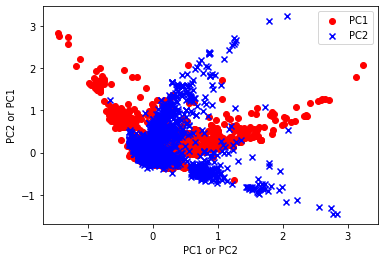

In [515]:
#Plotting the scatter plot for first two Principal components
plt.scatter(pca_df_tf[['PC1']], pca_df_tf[['PC2']], c='red', marker='o', label='PC1')
plt.scatter(pca_df_tf[['PC2']], pca_df_tf[['PC1']], c='blue', marker='x', label='PC2')

# add labels
plt.xlabel('PC1 or PC2')
plt.ylabel('PC2 or PC1')
plt.legend()

# show the plot
plt.show()

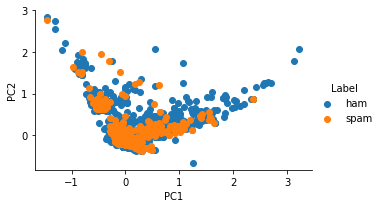

In [516]:
#Visualizing the words using PC1 and PC2

# Add the label to pca df for visualization
pca_df_tf['Label']= ['spam' if y ==1 else 'ham' for y in CountVectorizedData['Labels'] ]

fg = sns.FacetGrid(data=pca_df_tf, hue='Label', aspect=1.61)
fg.map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

**5b.2) Visualize the data across the first two PCs. PCA - TF-IDF Vectorization**

In [519]:
DataForML_tfidf['Labels'] = sms1['Labels']

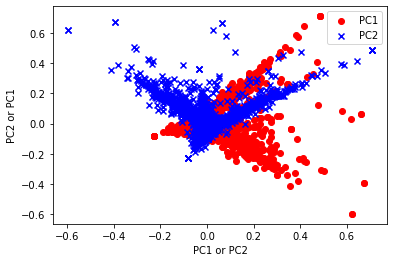

In [517]:
#Plotting the scatter plot for first two Principal components
plt.scatter(pca_df_tf_idf[['PC1']], pca_df_tf_idf[['PC2']], c='red', marker='o', label='PC1')
plt.scatter(pca_df_tf_idf[['PC2']], pca_df_tf_idf[['PC1']], c='blue', marker='x', label='PC2')

# add labels
plt.xlabel('PC1 or PC2')
plt.ylabel('PC2 or PC1')
plt.legend()

# show the plot
plt.show()

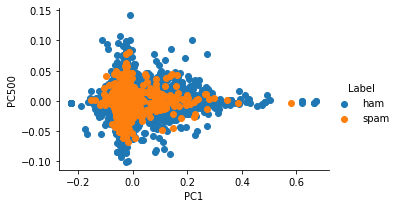

In [520]:
#Visualizing the words using PC1 and PC2

# Add the label to pca df for visualization
pca_df_tf_idf['Label']= ['spam' if y ==1 else 'ham' for y in DataForML_tfidf['Labels'] ]

fg = sns.FacetGrid(data=pca_df_tf_idf, hue='Label', aspect=1.61)
fg.map(plt.scatter, 'PC1', 'PC500').add_legend()
plt.show()

**5b.3) Visualize the data across the first two PCs. PCA - Word2vec Vectorization**

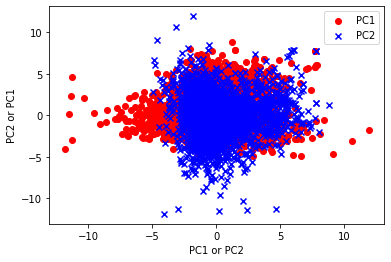

In [521]:
#Plotting the scatter plot for first two Principal components
plt.scatter(pca_df_w2v[['PC1']], pca_df_w2v[['PC2']], c='red', marker='o', label='PC1')
plt.scatter(pca_df_w2v[['PC2']], pca_df_w2v[['PC1']], c='blue', marker='x', label='PC2')

# add labels
plt.xlabel('PC1 or PC2')
plt.ylabel('PC2 or PC1')
plt.legend()

# show the plot
plt.show()

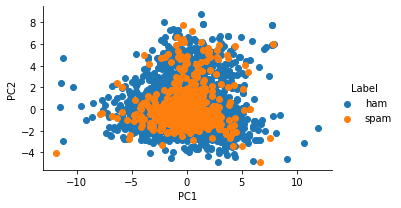

In [522]:
#Visualizing the words using PC1 and PC2

# Add the label to pca df for visualization
pca_df_w2v['Label']= ['spam' if y ==1 else 'ham' for y in DataForML_w2v['Labels'] ]

fg = sns.FacetGrid(data=pca_df_w2v, hue='Label', aspect=1.61)
fg.map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

**5c) You may try other heuristic approaches for dimension reduction as well like dropping texts that appear in less than p% of the documents.**

In [523]:
DTM_tf_dimred = DTM.copy()

In [524]:
#### Dimension Reduction
#Remove terms that is contained in less than 0.5% of the documents
DTM_tf_dimred.apply(lambda x: np.sum(x)/len(x), axis=0)

008704050406    0.000387
0089mi          0.000193
0121            0.000193
01223585236     0.000193
01223585334     0.000193
                  ...   
zogtoriu        0.000193
zoom            0.000193
zouk            0.000193
zyada           0.000193
üll             0.000580
Length: 8050, dtype: float64

In [525]:
#Remove terms that is contained in less than 0.01% of the documents
DTM_tf_dimred.drop(DTM_tf_dimred.columns[DTM_tf_dimred.apply(lambda x: np.sum(x)/np.sum(np.sum(DTM_tf_dimred)), axis=0) < 0.0001],axis=1, inplace=True)

In [526]:
DTM_tf_dimred.shape

(5169, 1440)

In [527]:
DTM_tf_dimred.head()

,0800,08000839402,08000930705,0870,08712300220,08712460324,08718720201,10,100,1000,...,yoga,yogasana,youd,youll,your,youv,yr,yun,yup,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [528]:
# TF-IDF vectorization of text
#!pip install sklearn.feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction import _stop_words
 
corpus = sms1['SMS'].values
 
# Creating the vectorizer
vectorizer = TfidfVectorizer()
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
tfidf_dimred=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
#tfidf_dimred['Labels']=sms1['Labels']
print(tfidf_dimred.shape)
tfidf_dimred.head()

(5169, 8050)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [529]:
#### Dimension Reduction
#Remove terms that is contained in less than 0.5% of the documents
tfidf_dimred.apply(lambda x: np.sum(x)/len(x), axis=0)

008704050406    0.000108
0089mi          0.000053
0121            0.000070
01223585236     0.000068
01223585334     0.000047
                  ...   
zogtoriu        0.000082
zoom            0.000059
zouk            0.000061
zyada           0.000033
üll             0.000276
Length: 8050, dtype: float64

In [530]:
# Dimension reduction by proportion
#using count vectoroizer to create a document-term matrix
dtm_sum = np.sum(np.sum(DTM))
#Remove terms that are in less than 0.01% of the documents
red_col = DTM.columns[DTM.apply(lambda x: np.sum(x)/dtm_sum, axis=0) < 0.0001]

# Reduced dataframe
tfidf_dimred.drop(red_col,axis=1, inplace=True)

In [531]:
tfidf_dimred.shape

(5169, 1440)

In [532]:
tfidf_dimred.head()

,0800,08000839402,08000930705,0870,08712300220,08712460324,08718720201,10,100,1000,...,yoga,yogasana,youd,youll,your,youv,yr,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [533]:
#Final reduced dataframes
DTM_tf_dimred['Labels'] = sms1['Labels']
tfidf_dimred['Labels']=sms1['Labels']

In [534]:
DTM_tf_dimred.head()

,0800,08000839402,08000930705,0870,08712300220,08712460324,08718720201,10,100,1000,...,yogasana,youd,youll,your,youv,yr,yun,yup,zed,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [535]:
tfidf_dimred.head()

,0800,08000839402,08000930705,0870,08712300220,08712460324,08718720201,10,100,1000,...,yogasana,youd,youll,your,youv,yr,yun,yup,zed,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Spam Filters        
**a) Use an appropriate model-building framework to experiment with machine learning models like
Logistic Regression, Decision Tree, Bagging, Boosting, Random Forest, SVM, etc. on the various
vectorized representations you have created in stage 4.**              
**b) Use appropriate hyperparameter tuning techniques to control underfitting and overfitting.**               
**c) Report the confusion matrix, accuracy, precision, recall and F1-score of spam detection for each
experiment you conduct.**                

In [565]:
# Creating a dataset to store the results of each model.
result = pd.DataFrame(columns=['Model','Validationn accuracy','Precision','recall score','F1 score'])

**6a.1) Model Fitting on TF** 

In [562]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, confusion_matrix, f1_score

In [560]:
# this is a general functtion to print confusion matrix
def print_cm(model_name, y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(2, 2))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='small')

    plt.xlabel('Predictions', fontsize=8)
    plt.ylabel('Actuals', fontsize=8)
    plt.title(model_name + ' Confusion Matrix',fontsize=8)
    plt.show()

In [552]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer
 
# Ticket Data
corpus = sms1['SMS'].values
 
# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
#CountVectorizedData['Labels']=sms1['Labels']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(5169, 7919)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [555]:
#Creating the target variable
TF_X = CountVectorizedData.copy()

In [556]:
TF_X.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [586]:
result_tf = pd.DataFrame(columns=['Model','Method','Validationn accuracy','Precision','recall score','F1 score'])

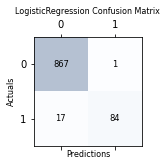

In [617]:
# TF - Running the models on DTM matrix created by TF

X = TF_X
y = sms1['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

#### LogisticRegression ####

model = LogisticRegression()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'LogisticRegression'
method = 'TF'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[0,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

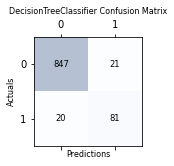

In [589]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'DecisionTreeClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[1,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
print_cm(model_name ,y_valid, y_pred_valid)

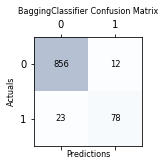

In [591]:
# BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'BaggingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[2,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

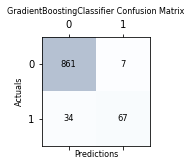

In [592]:
# GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name ='GradientBoostingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[3,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

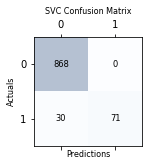

In [593]:
# SVC
model = SVC()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'SVC'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[4,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid) 

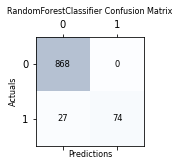

In [595]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'RandomForestClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[5,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

In [596]:
result_tf

,Model,Method,Validationn accuracy,Precision,recall score,F1 score
0,LogisticRegression,TF,0.981424,0.988235,0.831683,0.903226
1,DecisionTreeClassifier,TF,0.957688,0.794118,0.80198,0.79803
2,BaggingClassifier,TF,0.96388,0.866667,0.772277,0.816754
3,GradientBoostingClassifier,TF,0.957688,0.905405,0.663366,0.765714
4,SVC,TF,0.96904,1.0,0.70297,0.825581
5,RandomForestClassifier,TF,0.972136,1.0,0.732673,0.845714


**6a.1.1) Model Fitting on TF - PCA**

In [597]:
pca_df_tf.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC1978,PC1979,PC1980,PC1981,PC1982,PC1983,PC1984,PC1985,PC1986,Label
0,-0.052602,-0.089654,-0.161277,0.021205,-0.077408,0.136661,0.157514,-0.047851,-0.191446,-0.019775,...,-0.004855,-0.011454,0.073653,0.033249,-0.030622,0.017500,-0.068379,0.011838,-0.031091,ham
1,-0.101115,-0.098873,-0.200788,-0.021444,-0.137443,0.137500,0.183857,0.041705,-0.216659,0.008969,...,0.013309,-0.033711,0.002169,-0.026474,0.006391,0.001999,-0.000918,0.007891,0.044213,ham
2,-0.212642,1.020744,0.192184,-0.654225,0.520981,-0.082427,0.048459,-0.081990,-0.144754,0.029797,...,0.002208,-0.013819,-0.008828,-0.002743,-0.010757,-0.005261,0.000712,0.004496,0.007913,spam
3,0.001007,-0.119114,-0.142539,0.002013,-0.113095,-0.003039,0.079879,0.053956,-0.177059,-0.002986,...,0.002312,-0.013724,0.012041,0.000914,-0.004116,-0.013989,0.010194,0.011139,-0.006768,ham
4,0.006634,-0.122487,-0.004969,0.248689,0.036855,-0.644573,-0.227201,0.247256,0.014890,-0.136341,...,0.004578,0.000822,-0.022478,-0.004963,-0.005248,0.000438,0.013457,-0.020160,-0.008022,ham


In [602]:
pca_df_tf = pca_df_tf.drop('Label', axis=1)

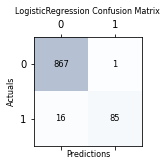

In [603]:
# TF - Running the models on DTM matrix created by TF

X = pca_df_tf
y = sms1['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

#### LogisticRegression ####

model = LogisticRegression()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'LogisticRegression'
method = 'TF-PCA'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[6,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

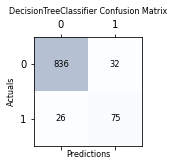

In [605]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'DecisionTreeClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[7,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
print_cm(model_name ,y_valid, y_pred_valid)

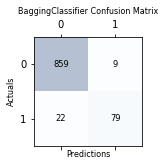

In [606]:
# BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'BaggingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[8,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

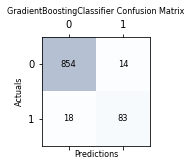

In [607]:
# GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name ='GradientBoostingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[9,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

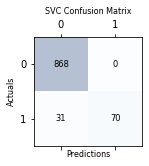

In [610]:
# SVC
model = SVC()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'SVC'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[10,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid) 

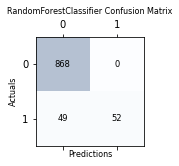

In [611]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'RandomForestClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[11,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

In [618]:
result_tf

,Model,Method,Validationn accuracy,Precision,recall score,F1 score
0,LogisticRegression,TF,0.981424,0.988235,0.831683,0.903226
1,DecisionTreeClassifier,TF,0.957688,0.794118,0.80198,0.79803
2,BaggingClassifier,TF,0.96388,0.866667,0.772277,0.816754
3,GradientBoostingClassifier,TF,0.957688,0.905405,0.663366,0.765714
4,SVC,TF,0.96904,1.0,0.70297,0.825581
5,RandomForestClassifier,TF,0.972136,1.0,0.732673,0.845714
6,LogisticRegression,TF-PCA,0.982456,0.988372,0.841584,0.909091
7,DecisionTreeClassifier,TF-PCA,0.940144,0.700935,0.742574,0.721154
8,BaggingClassifier,TF-PCA,0.968008,0.897727,0.782178,0.835979
9,GradientBoostingClassifier,TF-PCA,0.966976,0.85567,0.821782,0.838384


**6a.2) Model Fitting on TF-IDF** 

In [614]:
DataForML_tfidf.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [615]:
DataForML_tfidf = DataForML_tfidf.drop('Labels', axis=1)

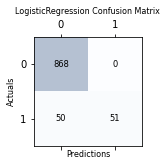

In [619]:
# TF - Running the models on DTM matrix created by TF

X = DataForML_tfidf
y = sms1['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

#### LogisticRegression ####

model = LogisticRegression()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'LogisticRegression'
method = 'TF-IDF'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[12,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

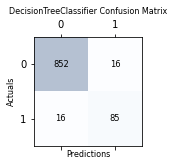

In [620]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'DecisionTreeClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[13,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
print_cm(model_name ,y_valid, y_pred_valid)

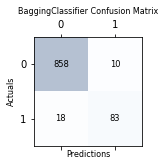

In [621]:
# BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'BaggingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[14,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

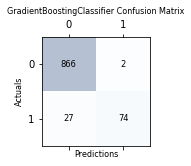

In [622]:
# GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name ='GradientBoostingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[15,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

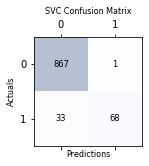

In [623]:
# SVC
model = SVC()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'SVC'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[16,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid) 

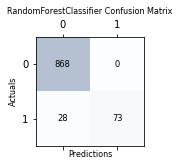

In [624]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'RandomForestClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[17,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

In [625]:
result_tf

,Model,Method,Validationn accuracy,Precision,recall score,F1 score
0,LogisticRegression,TF,0.981424,0.988235,0.831683,0.903226
1,DecisionTreeClassifier,TF,0.957688,0.794118,0.80198,0.79803
2,BaggingClassifier,TF,0.96388,0.866667,0.772277,0.816754
3,GradientBoostingClassifier,TF,0.957688,0.905405,0.663366,0.765714
4,SVC,TF,0.96904,1.0,0.70297,0.825581
5,RandomForestClassifier,TF,0.972136,1.0,0.732673,0.845714
6,LogisticRegression,TF-PCA,0.982456,0.988372,0.841584,0.909091
7,DecisionTreeClassifier,TF-PCA,0.940144,0.700935,0.742574,0.721154
8,BaggingClassifier,TF-PCA,0.968008,0.897727,0.782178,0.835979
9,GradientBoostingClassifier,TF-PCA,0.966976,0.85567,0.821782,0.838384


**6a.2.1) Model Fitting on TF-IDF PCA**

In [626]:
pca_df_tf_idf.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC2656,PC2657,PC2658,PC2659,PC2660,PC2661,PC2662,PC2663,PC2664,Label
0,-0.013297,-0.015851,0.015378,-0.029680,-0.044981,0.060774,0.026428,-0.052291,0.027046,-0.035838,...,-0.007175,-0.009570,-0.003463,-0.000742,-0.009012,0.007516,-0.001211,-0.004534,-0.001788,ham
1,0.261151,-0.074462,-0.022866,-0.024676,-0.002088,-0.032264,-0.001111,0.011728,-0.014064,-0.040703,...,0.000996,0.010110,-0.011765,-0.001353,0.007432,-0.000104,0.001775,-0.004464,-0.006430,ham
2,-0.034760,-0.046021,-0.009480,0.000213,-0.075021,-0.079851,-0.060467,0.022165,0.034634,0.042969,...,-0.000520,-0.002891,0.003297,-0.000519,-0.005961,0.004390,0.003045,0.002088,0.003496,spam
3,0.005760,-0.021255,0.005751,-0.006732,-0.038283,0.055973,0.072040,-0.004632,-0.039830,-0.048227,...,0.028900,0.011078,0.003506,-0.021577,-0.007501,0.014549,0.033649,-0.003305,0.012980,ham
4,-0.041329,-0.029994,-0.002611,-0.003890,0.110698,0.049838,0.053672,0.147876,-0.001612,0.015183,...,-0.004579,0.000745,-0.001203,-0.002048,-0.003585,-0.002599,0.004795,0.001996,-0.003362,ham


In [627]:
pca_df_tf_idf = pca_df_tf_idf.drop('Label', axis=1)

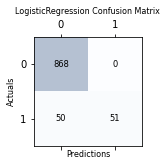

In [628]:
# TF - Running the models on DTM matrix created by TF

X = pca_df_tf_idf
y = sms1['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

#### LogisticRegression ####

model = LogisticRegression()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'LogisticRegression'
method = 'TF-IDF-PCA'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[18,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

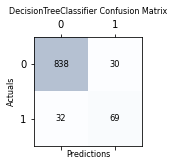

In [629]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'DecisionTreeClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[19,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
print_cm(model_name ,y_valid, y_pred_valid)

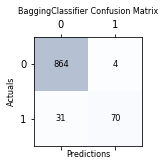

In [630]:
# BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'BaggingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[20,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

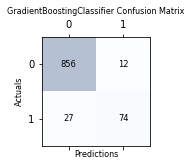

In [631]:
# GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name ='GradientBoostingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[21,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

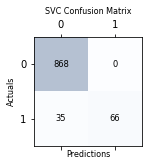

In [632]:
# SVC
model = SVC()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'SVC'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[22,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid) 

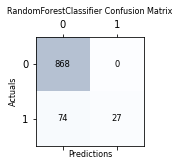

In [633]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'RandomForestClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[23,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

In [634]:
result_tf

,Model,Method,Validationn accuracy,Precision,recall score,F1 score
0,LogisticRegression,TF,0.981424,0.988235,0.831683,0.903226
1,DecisionTreeClassifier,TF,0.957688,0.794118,0.80198,0.79803
2,BaggingClassifier,TF,0.96388,0.866667,0.772277,0.816754
3,GradientBoostingClassifier,TF,0.957688,0.905405,0.663366,0.765714
4,SVC,TF,0.96904,1.0,0.70297,0.825581
5,RandomForestClassifier,TF,0.972136,1.0,0.732673,0.845714
6,LogisticRegression,TF-PCA,0.982456,0.988372,0.841584,0.909091
7,DecisionTreeClassifier,TF-PCA,0.940144,0.700935,0.742574,0.721154
8,BaggingClassifier,TF-PCA,0.968008,0.897727,0.782178,0.835979
9,GradientBoostingClassifier,TF-PCA,0.966976,0.85567,0.821782,0.838384


**6a.3) Model Fitting on Word2vec** 

In [635]:
DataForML_w2v.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Labels
0,-0.267883,0.761475,0.576538,2.297852,0.047028,0.343628,0.933655,-0.978302,-0.044128,0.892578,...,0.603821,-1.525879,0.846588,-0.092361,-0.592651,-0.530762,-0.948242,-0.427490,0.372101,0.0
1,-0.260757,0.299438,0.103943,0.685059,-0.372070,0.508789,-0.010742,-0.102234,0.265869,0.547363,...,0.501221,-0.682556,0.096069,-0.933594,-0.669067,-0.769531,-0.490814,-0.537598,0.562988,0.0
2,-0.268555,0.125000,-0.585083,0.800537,0.284790,0.121674,-0.342163,-1.007172,0.780762,1.662231,...,0.350830,-0.495300,-0.639526,-0.289978,-0.859619,-0.236603,-1.437988,-1.117363,0.381886,1.0
3,-0.021484,0.142090,0.479492,0.430664,-0.154297,0.204826,0.240601,0.078369,-0.057617,0.705078,...,0.458252,0.031738,0.168457,-0.274170,-0.448730,-0.166267,-0.275879,-0.116211,0.491211,0.0
4,-0.175049,0.204865,0.431030,1.067383,0.147339,0.149414,0.373901,-0.354286,0.357178,0.268799,...,0.792114,-0.755615,0.191040,-0.988739,-0.184326,-0.165039,-0.400024,-0.096867,0.263184,0.0


In [636]:
DataForML_w2v = DataForML_w2v.drop('Labels', axis=1)

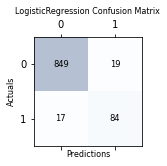

In [637]:
# TF - Running the models on DTM matrix created by TF

X = DataForML_w2v
y = sms1['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

#### LogisticRegression ####

model = LogisticRegression()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'LogisticRegression'
method = 'Word2vec'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[24,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

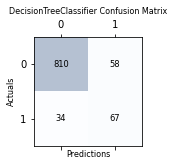

In [638]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'DecisionTreeClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[25,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
print_cm(model_name ,y_valid, y_pred_valid)

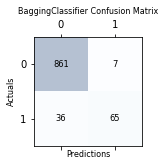

In [639]:
# BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'BaggingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[26,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

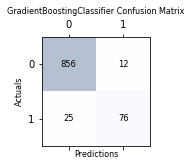

In [640]:
# GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name ='GradientBoostingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[27,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

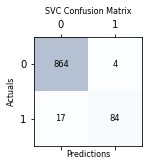

In [641]:
# SVC
model = SVC()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'SVC'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[28,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid) 

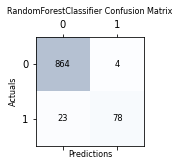

In [642]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'RandomForestClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[29,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

In [643]:
result_tf

,Model,Method,Validationn accuracy,Precision,recall score,F1 score
0,LogisticRegression,TF,0.981424,0.988235,0.831683,0.903226
1,DecisionTreeClassifier,TF,0.957688,0.794118,0.80198,0.79803
2,BaggingClassifier,TF,0.96388,0.866667,0.772277,0.816754
3,GradientBoostingClassifier,TF,0.957688,0.905405,0.663366,0.765714
4,SVC,TF,0.96904,1.0,0.70297,0.825581
5,RandomForestClassifier,TF,0.972136,1.0,0.732673,0.845714
6,LogisticRegression,TF-PCA,0.982456,0.988372,0.841584,0.909091
7,DecisionTreeClassifier,TF-PCA,0.940144,0.700935,0.742574,0.721154
8,BaggingClassifier,TF-PCA,0.968008,0.897727,0.782178,0.835979
9,GradientBoostingClassifier,TF-PCA,0.966976,0.85567,0.821782,0.838384


**6a.3.1) Model Fitting on Word2vec PCA**

In [644]:
pca_df_w2v.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,Label
0,4.593108,1.990878,0.306229,1.568848,0.797211,-0.353826,1.199734,1.794574,-0.277107,-0.439807,...,0.190081,-0.147684,0.858071,-0.038947,-0.442995,-0.096936,0.056976,-0.420161,0.263901,ham
1,1.608939,3.406525,-2.055754,0.472990,-0.024215,-0.408223,0.660425,-0.627615,0.472069,0.087565,...,0.393304,-0.087205,0.019666,-0.320669,-0.047569,0.061502,-0.016074,-0.013517,-0.109073,ham
2,3.722108,2.767007,4.784284,0.369549,-0.576691,0.929872,-0.748011,0.637498,-0.233331,-1.274875,...,-0.044706,-0.222326,-0.376879,-0.194665,-0.017635,-0.069881,-0.115302,-0.614813,0.287777,spam
3,-1.558985,1.721529,-1.391450,0.019194,1.096865,-0.734270,0.658505,-0.436661,-0.581797,-0.407857,...,0.200844,0.347919,-0.206447,0.330118,-0.025064,0.179036,0.012035,-0.092829,0.105784,ham
4,0.841145,0.730422,-2.276111,-1.615407,-0.274342,-0.399010,0.280895,0.702735,0.317601,0.199858,...,-0.121587,0.008405,-0.067583,-0.019639,-0.090626,0.066955,0.245682,-0.140514,0.203163,ham


In [645]:
pca_df_w2v = pca_df_w2v.drop('Label', axis=1)

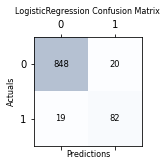

In [666]:
# TF - Running the models on DTM matrix created by TF

X = pca_df_w2v
y = sms1['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

#### LogisticRegression ####

model = LogisticRegression()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'LogisticRegression'
method = 'Word2vec-PCA'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[30,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

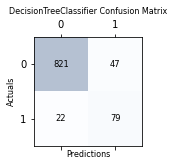

In [667]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'DecisionTreeClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[31,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
print_cm(model_name ,y_valid, y_pred_valid)

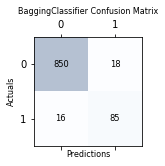

In [668]:
# BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'BaggingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[32,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

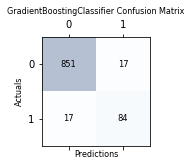

In [649]:
# GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name ='GradientBoostingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[33,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

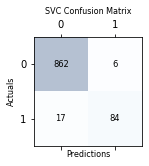

In [650]:
# SVC
model = SVC()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'SVC'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[34,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid) 

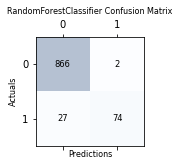

In [651]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'RandomForestClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[35,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

In [669]:
result_tf

,Model,Method,Validationn accuracy,Precision,recall score,F1 score
0,LogisticRegression,TF,0.981424,0.988235,0.831683,0.903226
1,DecisionTreeClassifier,TF,0.957688,0.794118,0.80198,0.79803
2,BaggingClassifier,TF,0.96388,0.866667,0.772277,0.816754
3,GradientBoostingClassifier,TF,0.957688,0.905405,0.663366,0.765714
4,SVC,TF,0.96904,1.0,0.70297,0.825581
5,RandomForestClassifier,TF,0.972136,1.0,0.732673,0.845714
6,LogisticRegression,TF-PCA,0.982456,0.988372,0.841584,0.909091
7,DecisionTreeClassifier,TF-PCA,0.940144,0.700935,0.742574,0.721154
8,BaggingClassifier,TF-PCA,0.968008,0.897727,0.782178,0.835979
9,GradientBoostingClassifier,TF-PCA,0.966976,0.85567,0.821782,0.838384


**6a.4) Model Fitting on Heuristic** 

In [659]:
heuristic = sms1.copy()

In [660]:
heuristic = heuristic.drop(['Labels','SMS'], axis=1)

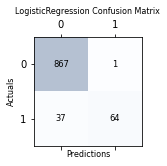

In [670]:
# TF - Running the models on DTM matrix created by TF

X = heuristic
y = sms1['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

#### LogisticRegression ####

model = LogisticRegression()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'LogisticRegression'
method = 'heuristic'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[36,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

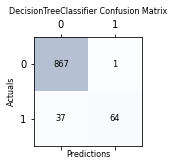

In [671]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
     
model_name = 'DecisionTreeClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[37,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
print_cm(model_name ,y_valid, y_pred_valid)

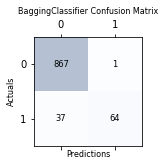

In [672]:
# BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
    
y_pred_valid = model.predict(X_valid)
    
model_name = 'BaggingClassifier'
    
# calculating differnet scores and storing in result dataframe
result_tf.loc[38,] = [model_name, method, accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), 
                                recall_score(y_valid, y_pred_valid),
                               f1_score(y_valid, y_pred_valid)]
    
# calling confusion matrix print function
print_cm(model_name ,y_valid, y_pred_valid)

In [673]:
result_tf

,Model,Method,Validationn accuracy,Precision,recall score,F1 score
0,LogisticRegression,TF,0.981424,0.988235,0.831683,0.903226
1,DecisionTreeClassifier,TF,0.957688,0.794118,0.80198,0.79803
2,BaggingClassifier,TF,0.96388,0.866667,0.772277,0.816754
3,GradientBoostingClassifier,TF,0.957688,0.905405,0.663366,0.765714
4,SVC,TF,0.96904,1.0,0.70297,0.825581
5,RandomForestClassifier,TF,0.972136,1.0,0.732673,0.845714
6,LogisticRegression,TF-PCA,0.982456,0.988372,0.841584,0.909091
7,DecisionTreeClassifier,TF-PCA,0.940144,0.700935,0.742574,0.721154
8,BaggingClassifier,TF-PCA,0.968008,0.897727,0.782178,0.835979
9,GradientBoostingClassifier,TF-PCA,0.966976,0.85567,0.821782,0.838384


In [674]:
# Sorting the models based on F1 score
result_tf.sort_values('F1 score', ascending=False)

,Model,Method,Validationn accuracy,Precision,recall score,F1 score
6,LogisticRegression,TF-PCA,0.982456,0.988372,0.841584,0.909091
0,LogisticRegression,TF,0.981424,0.988235,0.831683,0.903226
28,SVC,Word2vec,0.978328,0.954545,0.831683,0.888889
34,SVC,Word2vec-PCA,0.976264,0.933333,0.831683,0.879581
14,BaggingClassifier,TF-IDF,0.971104,0.892473,0.821782,0.85567
29,RandomForestClassifier,Word2vec,0.972136,0.95122,0.772277,0.852459
5,RandomForestClassifier,TF,0.972136,1.0,0.732673,0.845714
13,DecisionTreeClassifier,TF-IDF,0.966976,0.841584,0.841584,0.841584
17,RandomForestClassifier,TF-IDF,0.971104,1.0,0.722772,0.83908
9,GradientBoostingClassifier,TF-PCA,0.966976,0.85567,0.821782,0.838384


### Hyperparameter Tuning

In [695]:
# Creating a dataset to store the results of each model.
Tuned_result = pd.DataFrame(columns=['Method','Model','Validationn accuracy','Precision','recall score','F1 score'])

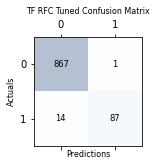

In [699]:
X = TF_X
y = sms1['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

model = LogisticRegression(C=30)
model.fit(X_train,y_train)
y_pred_valid = model.predict(X_valid)

# calculating differnet scores and storing in final results dataframe
Tuned_result.loc[0,] = ['TF','LogisticRegression Tuned', accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), recall_score(y_valid, y_pred_valid),f1_score(y_valid, y_pred_valid)]

print_cm('TF RFC Tuned' ,y_valid, y_pred_valid)

In [700]:
Tuned_result

,Method,Model,Validationn accuracy,Precision,recall score,F1 score
0,TF,LogisticRegression Tuned,0.98452,0.988636,0.861386,0.920635


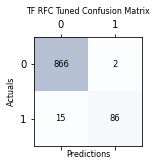

In [701]:
X = pca_df_tf
y = sms1['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

model = LogisticRegression(C=30)
model.fit(X_train,y_train)
y_pred_valid = model.predict(X_valid)

# calculating differnet scores and storing in final results dataframe
Tuned_result.loc[1,] = ['TF','LogisticRegression Tuned', accuracy_score(y_valid, y_pred_valid), precision_score(y_valid, y_pred_valid), recall_score(y_valid, y_pred_valid),f1_score(y_valid, y_pred_valid)]

print_cm('TF RFC Tuned' ,y_valid, y_pred_valid)

In [702]:
Tuned_result

,Method,Model,Validationn accuracy,Precision,recall score,F1 score
0,TF,LogisticRegression Tuned,0.98452,0.988636,0.861386,0.920635
1,TF,LogisticRegression Tuned,0.982456,0.977273,0.851485,0.910053


**Conclusion** 

In [705]:
# Final model

X = TF_X
y = sms1['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)

# Fitting final model
final_model = LogisticRegression(C=30)
final_model.fit(X_train, y_train)

y_pred_test = final_model.predict(X_test)

print('Final model')

print('Accuracy score on test data is :', accuracy_score(y_test, y_pred_test))
print('Recall score on test data is :', recall_score(y_test, y_pred_test))
print('Precision score on test data is :', precision_score(y_test, y_pred_test))
print('F1 score on test data is :', f1_score(y_test, y_pred_test))

Final model
Accuracy score on test data is : 0.9767981438515081
Recall score on test data is : 0.8242424242424242
Precision score on test data is : 0.9927007299270073
F1 score on test data is : 0.9006622516556291


### Inferences
1) Out of all the models, we got F1 score of 0.90 for TF-Vectorization with Hyperparameter tuned       
2) The Top performing models apart from the best model are tabulated above detailedly     
3) The selected best performing model out of all has got 0.92 f1 score. properly classifying the spam and ham SMS.    
4) The overfitting and underfitting in the model were taken care with hyperparameter tuning     
5) The precision score on the data is 99.2%      
6) The Accuracy score is 97.6%        
The exercise was thoroughly done on the dataset of SMS spam detection to correctly classify whether a message is spam or ham, Various text pre-processing, vectorization and dimensionality reduction was considered to drive the best possible results. Further the analysis can be concentrated on the aspects of finding more heuristic features in the messages to classify the SMS. In this work, we have considered the "presence of phone No" as a heuristic feature, there is scope to identify more features to improve our classification accuracy.       